In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image


In [ ]:
IMAGE_FILE = "./rf_specgram_example/2.42e9_56000000_0_5s_16928020128.png"
LABEL_FILE = "./2.42e9_56000000_0_5s_16928020128.txt"

(1024, 512)


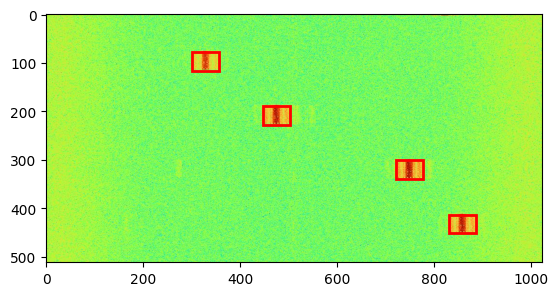

In [3]:
# Display the image
img = Image.open(IMAGE_FILE)
plt.imshow(img)

print(img.size)

with open(LABEL_FILE, "r", encoding="utf-8") as f:
    b_boxes = f.readlines()
    for line in b_boxes:
        parsed_box = line.split(" ")
        class_idx = parsed_box[0]

        points_x_y_center_w_h = [float(x.rstrip()) for x in parsed_box[1:]]
        points_x_y_center_w_h = [
            points_x_y_center_w_h[0] * img.size[0],
            points_x_y_center_w_h[1] * img.size[1],
            points_x_y_center_w_h[2] * img.size[0],
            points_x_y_center_w_h[3] * img.size[1],
        ]
        x_min = points_x_y_center_w_h[0] - points_x_y_center_w_h[2] / 2
        y_min = points_x_y_center_w_h[1] - points_x_y_center_w_h[3] / 2
        plt.gca().add_patch(
            Rectangle(
                (x_min, y_min),
                points_x_y_center_w_h[2],
                points_x_y_center_w_h[3],
                linewidth=2,
                edgecolor="r",
                facecolor="none",
            )
        )

plt.show()